## Small project

This small project aims to compare the real-life behavior of sorting algorithms with theoretical expectations. This requires measurements: real-life, physical experiments on computer code and data of repeated tests run on sorted data. In your paper, you shall implement and benchmark the following sorting algorithms, using the algorithms presented in pseudocode in the course:

* Insertion sort
* Merge sort
* Quicksort

In your benchmarks, you shall use test data suitable to test the the behavior of the algorithms under the worst-case, best case and average-case scenarios. In order to study the scaling behavior of algorithms with problem size, one usually increases problem size 𝑛 by a factor, e.g., 2, 10 or 16 instead of increasing the problem size linearly.
You can limit your largest problem size so that the full set of all benchmarks do not execute long on your computer. Drop test cases that take a too long time (e.g., large sizes for quadratic algorithms)

In [1]:
# imports
import random
import time
from prettytable import PrettyTable
import matplotlib.pyplot as plt

### Insertion sort

In [2]:
def insertion_sort(A):
    for j in range(1, len(A)):
        key = A[j]
        i = j - 1
        while i >= 0 and A[i] > key:
            A[i + 1] = A[i]  
            i = i - 1
        A[i + 1] = key  

Sortert array er: [5, 6, 11, 12, 13]


### Merge sort

In [3]:
# This function sorts an array using the merge sort algorithm
def merge_sort(A, p, r):
    if p < r:
        q = (p + r) // 2        # Splits the array into two approximately equal halves
        merge_sort(A, p, q)     # Recursively sorts the left half
        merge_sort(A, q + 1, r) # Recursively sorts the right half
        merge(A, p, q, r)       # Merges the two sorted halves


# This function merges the two sorted arrays
# A is the array and p, q, r are indices where p <= q < r
def merge(A, p, q, r):
    
    # Initialises the variables to represent the two halves
    n1 = q - p + 1     
    n2 = r - q          
    
    left = [0] * (n1)    
    right = [0] * (n2)  

    # Copies the two halves into the left and right arrays
    for i in range(0, n1):
        left[i] = A[p + i]

    for j in range(0, n2):
        right[j] = A[q + 1 + j]
    
    i = j = 0
    k = p

    # Merges the two halves into the original array
    while i < n1 and j < n2:
        if left[i] <= right[j]:
            A[k] = left[i]
            i += 1
        else:
            A[k] = right[j]
            j += 1
        k += 1
    
    while i < n1:
        A[k] = left[i]
        i += 1
        k += 1

    while j < n2:
        A[k] = right[j]
        j += 1
        k += 1

[1, 2, 2, 3, 4, 5, 6, 7]


### Quick sort

In [4]:
def quicksort(A, p, r):
    if p < r:
        q = partition(A, p, r)
        quicksort(A, p, q - 1)
        quicksort(A, q + 1, r)

def partition(A, p, r):
    x = A[r]  # Pivot selection
    i = p - 1
    for j in range(p, r):
        if A[j] <= x:
            i = i + 1
            A[i], A[j] = A[j], A[i]
    A[i + 1], A[r] = A[r], A[i + 1]
    return i + 1

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


### Benchmarking

In [5]:
def best_case(n):
    return list(range(n))

def worst_case(n):
    return list(range(n, 0, -1))

def average_case(n):
    lst = list(range(n))
    random.shuffle(lst)
    return lst

# Funksjon for å måle kjøretid av Insertion Sort
def measure_sort_time(func, data):
    start_time = time.time()
    func(data)
    return time.time() - start_time

# Teste størrelser
sizes = [10, 100, 1000, 10000]  # Insertion Sort kan være svært langsom for store størrelser

# Tomme lister
best_times = []
worst_times = []
average_times = []

# Kjøre tester
table = PrettyTable()
table.field_names = ["Størrelse", "Beste tilfelle tid (sek)", "Verste tilfelle tid (sek)", "Gjennomsnittlig tilfelle tid (sek)"]

for size in sizes:
    data_best = best_case(size)
    time_best = measure_sort_time(insertion_sort, data_best[:])
    best_times.append(time_best)
    
    data_worst = worst_case(size)
    time_worst = measure_sort_time(insertion_sort, data_worst[:])
    worst_times.append(time_worst)
    
    data_average = average_case(size)
    time_average = measure_sort_time(insertion_sort, data_average[:])
    average_times.append(time_average)
    
    # Legger til en ny rad i tabellen for hver størrelse
    table.add_row([size, f"{time_best:.8f}", f"{time_worst:.8f}", f"{time_average:.8f}"])

print(table)


+-----------+--------------------------+---------------------------+------------------------------------+
| Størrelse | Beste tilfelle tid (sek) | Verste tilfelle tid (sek) | Gjennomsnittlig tilfelle tid (sek) |
+-----------+--------------------------+---------------------------+------------------------------------+
|     10    |        0.00000000        |         0.00000000        |             0.00000000             |
|    100    |        0.00000000        |         0.00299859        |             0.00000000             |
|    1000   |        0.00100064        |         0.12164950        |             0.05325413             |
|   10000   |        0.00256681        |         7.40758681        |             3.97566628             |
+-----------+--------------------------+---------------------------+------------------------------------+


### Vizualization

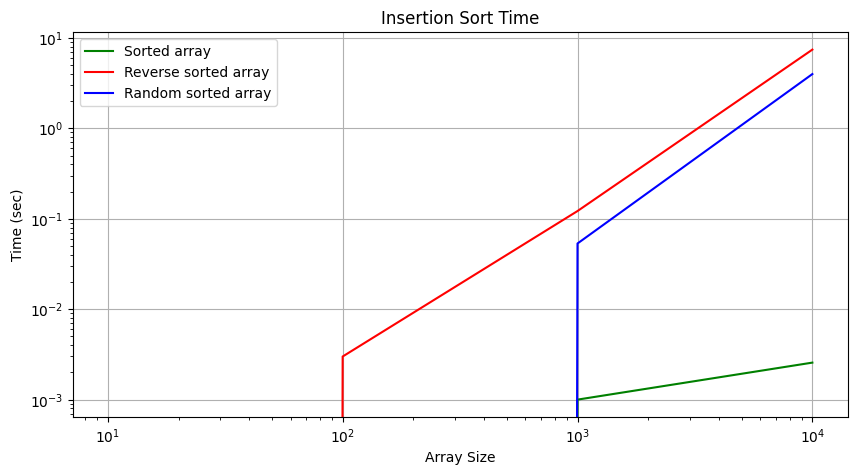

In [7]:
plt.figure(figsize=[10,5])
plt.plot(sizes, best_times, 'g-', label='Sorted array')
plt.plot(sizes, worst_times, 'r-', label='Reverse sorted array')
plt.plot(sizes, average_times, 'b-', label='Random sorted array')
plt.xlabel('Array Size')
plt.ylabel('Time (sec)')
plt.title('Insertion Sort Time')
plt.legend()
plt.grid(True)
plt.xscale('log') 
plt.yscale('log')
plt.show()